<a href="https://colab.research.google.com/github/sejii93/Probability-Model/blob/main/Exponential_Smoothing_2019_full.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [178]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [328]:
#df = pd.read_csv('/content/drive/MyDrive/probability model/Passenger data_intl_2019.csv',parse_dates=['date'],index_col='date')

#df = pd.read_csv('/content/drive/MyDrive/probability model/Passenger data_intl.csv',parse_dates=['date'],index_col='date')

df = pd.read_csv('/content/drive/MyDrive/probability model/Passenger data_intl_2012_2019.csv',parse_dates=['date'],index_col='date')
                 
df.head(10)

,Intl pax
date,
2012-01-01,932340
2012-02-01,915643
2012-03-01,911708
2012-04-01,900309
2012-05-01,883210
2012-06-01,902648
2012-07-01,1011516
2012-08-01,1122666
2012-09-01,939395


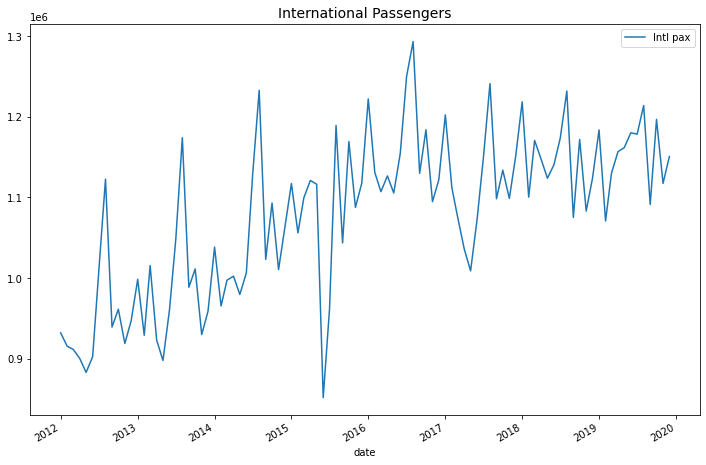

In [329]:
## time series plot
df.plot(figsize=[12,8])
plt.title('International Passengers', fontsize=14)
plt.show()

In [398]:
## split between the training and the test data sets. 
## The last 12 periods form the test data
df_train = df.iloc[:-12]
df_test = df.iloc[-12:]

In [399]:
## exponential smoothing in Python
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

## Holt's Winters's method for time series data with Seasonality
from statsmodels.tsa.holtwinters import ExponentialSmoothing as HWES

# Simple Exponential Smoothing
fit1 = SimpleExpSmoothing(df_train,).fit()

# Trend
fit2 = Holt(df_train).fit()

# Exponential trend
fit3 = Holt(df_train,exponential=True).fit()

# additive model for fixed seasonal variation
fit6 = HWES(df_train, 
             seasonal_periods=12, 
             trend='add', 
             seasonal='add').fit(optimized=True, use_brute=True)

# multiplicative model for increasing seasonal variation
fit7 = HWES(df_train, 
             seasonal_periods=12, 
             trend='add', 
             seasonal='mul').fit(optimized=True, use_brute=True)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored wh

In [400]:
## accessing the results of SimpleExpSmoothing Model
print(fit1.summary())

## accessing the results of 
print(fit2.summary())

## accessing the results of 
print(fit3.summary())

## accessing the results of 
print(fit6.summary())

## accessing the results of 
print(fit7.summary())

                       SimpleExpSmoothing Model Results                       
Dep. Variable:                  endog   No. Observations:                   83
Model:             SimpleExpSmoothing   SSE                   469547320219.875
Optimized:                       True   AIC                           1867.864
Trend:                           None   BIC                           1872.702
Seasonal:                        None   AICC                          1868.377
Seasonal Periods:                None   Date:                 Tue, 31 May 2022
Box-Cox:                        False   Time:                         14:15:16
Box-Cox Coeff.:                  None                                         
                       coeff                 code              optimized      
------------------------------------------------------------------------------
smoothing_level            0.2007687                alpha                 True
initial_level             9.3234e+05                

In [402]:
## forecasting for 12 months
forecast_1 = fit1.forecast(12)
forecast_2 = fit2.forecast(12)
forecast_3 = fit3.forecast(12)
forecast_6 = fit6.forecast(12)
forecast_7 = fit7.forecast(12)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Pre

In [403]:
y_test = df_test['Intl pax']

t_p = pd.DataFrame({'test': y_test, 
                    'f1': forecast_1, 
                    'f2': forecast_2, 
                    'f3': forecast_3, 
                    'f6': forecast_6, 
                    'f7': forecast_7})    

print(t_p)

                                    test  f1  f2  f3  f6  f7
1970-01-01 00:00:00.000000083        NaN NaN NaN NaN NaN NaN
1970-01-01 00:00:00.000000084        NaN NaN NaN NaN NaN NaN
1970-01-01 00:00:00.000000085        NaN NaN NaN NaN NaN NaN
1970-01-01 00:00:00.000000086        NaN NaN NaN NaN NaN NaN
1970-01-01 00:00:00.000000087        NaN NaN NaN NaN NaN NaN
1970-01-01 00:00:00.000000088        NaN NaN NaN NaN NaN NaN
1970-01-01 00:00:00.000000089        NaN NaN NaN NaN NaN NaN
1970-01-01 00:00:00.000000090        NaN NaN NaN NaN NaN NaN
1970-01-01 00:00:00.000000091        NaN NaN NaN NaN NaN NaN
1970-01-01 00:00:00.000000092        NaN NaN NaN NaN NaN NaN
1970-01-01 00:00:00.000000093        NaN NaN NaN NaN NaN NaN
1970-01-01 00:00:00.000000094        NaN NaN NaN NaN NaN NaN
2019-01-01 00:00:00.000000000  1183719.0 NaN NaN NaN NaN NaN
2019-02-01 00:00:00.000000000  1070895.0 NaN NaN NaN NaN NaN
2019-03-01 00:00:00.000000000  1129962.0 NaN NaN NaN NaN NaN
2019-04-01 00:00:00.0000

In [404]:
## UDF for counting the number of parameters in model
def num_params(model):
    n_params = 0

    for p in list(model.params.values()):
        if isinstance(p, np.ndarray):
            n_params += len(p)
            #print(p)
        elif p in [np.nan, False, None]:
            pass
        elif np.isnan(float(p)):
            pass
        else:
            n_params += 1
            #print(p)
    
    return n_params

In [405]:
num_params(fit1)
#모든 모델의 갯수를 나타내자

2

In [406]:
## number of observations in training set
T = df_train.shape[0]
print(T)

83


In [407]:
## evaluation metrics
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import mean_absolute_error as MAE

# Mean Absolute Percentage Error
def SSE(y_test, y_pred):
    y_test, y_pred = np.array(y_test), np.array(y_pred)
    return np.sum((y_test - y_pred)**2)

def ME(y_test, y_pred):
    y_test, y_pred = np.array(y_test), np.array(y_pred)
    return np.mean(y_test - y_pred)

def RMSE(y_test, y_pred):
    y_test, y_pred = np.array(y_test), np.array(y_pred)
    return np.sqrt(np.mean((y_test - y_pred)**2))   
    #return np.sqrt(MSE(y_test - y_pred))

def MPE(y_test, y_pred): 
    y_test, y_pred = np.array(y_test), np.array(y_pred)
    return np.mean((y_test - y_pred) / y_test) * 100

def MAPE(y_test, y_pred): 
    y_test, y_pred = np.array(y_test), np.array(y_pred)
    return np.mean(np.abs((y_test - y_pred) / y_test)) * 100

def AIC(y_test, y_pred, T, model):
    y_test, y_pred = np.array(y_test), np.array(y_pred)
    sse = np.sum((y_test - y_pred)**2)
    #T = len(y_train) # number of observations
    k = num_params(model) # number of parameters
    return T * np.log(sse/T) + 2*k

def SBC(y_test, y_pred, T, model):
    y_test, y_pred = np.array(y_test), np.array(y_pred)
    sse = np.sum((y_test - y_pred)**2)
    #T = len(y_train) # number of observations
    k = num_params(model) # number of parameters
    return T * np.log(sse/T) + k * np.log(T)

def APC(y_test, y_pred, T, model):
    y_test, y_pred = np.array(y_test), np.array(y_pred)
    sse = np.sum((y_test - y_pred)**2)
    #T = len(y_train) # number of observations
    k = num_params(model) # number of parameters
    return ((T+k)/(T-k)) * sse / T

def ADJ_R2(y_test, y_pred, T, model):
    y_test, y_pred = np.array(y_test), np.array(y_pred)
    sst = np.sum((y_test - np.mean(y_test))**2)
    sse = np.sum((y_test - y_pred)**2)
    #T = len(y_train) # number of observations
    k = num_params(model) # number of parameters
    r2 = 1 - sse/sst
    return 1 - ((T - 1)/(T - k)) * (1 - r2)

In [408]:
## Combining all metrics together
def eval_all(y_test, y_pred, T, model):
    sse = SSE(y_test, y_pred)
    mse = MSE(y_test, y_pred)
    rmse = RMSE(y_test, y_pred)
    me = ME(y_test, y_pred)
    mae = MAE(y_test, y_pred)
    mpe = MPE(y_test, y_pred)
    mape = MAPE(y_test, y_pred)
    aic = AIC(y_test, y_pred, T, model)
    sbc = SBC(y_test, y_pred, T, model)
    apc = APC(y_test, y_pred, T, model)
    adj_r2 = ADJ_R2(y_test, y_pred, T, model)
    
    return [sse, mse, rmse, me, mae, mpe, mape, aic, sbc, apc, adj_r2]

In [409]:
eval_all_df = pd.DataFrame(
    {'SES': eval_all(y_test, forecast_1, T, fit1), 
    "Holt's": eval_all(y_test, forecast_2, T, fit2), 
    'Exponential': eval_all(y_test, forecast_3, T, fit3), 
    'Trend_Season_Add': eval_all(y_test, forecast_6, T, fit6), 
    'Trend_Season_Mult': eval_all(y_test, forecast_7, T, fit7)}
    , index=['SSE', 'MSE', 'RMSE', 'ME', 'MAE', 'MPE', 'MAPE', 'AIC', 'SBC', 'APC', 'Adj_R2'])

print(eval_all_df)

                 SES        Holt's   Exponential  Trend_Season_Add  \
SSE     2.421542e+10  3.183464e+10  3.034949e+10      1.497078e+10   
MSE     2.017951e+09  2.652887e+09  2.529124e+09      1.247565e+09   
RMSE    4.492161e+04  5.150618e+04  5.029040e+04      3.532089e+04   
ME      1.781395e+04 -3.094681e+04 -2.845497e+04      4.286565e+03   
MAE     3.945421e+04  3.840045e+04  3.730652e+04      2.913087e+04   
MPE     1.416624e+00 -2.816468e+00 -2.599213e+00      3.260633e-01   
MAPE    3.409403e+00  3.435850e+00  3.336200e+00      2.528464e+00   
AIC     1.621787e+03  1.648493e+03  1.642528e+03      1.611874e+03   
SBC     1.626625e+03  1.658169e+03  1.649785e+03      1.652994e+03   
APC     3.061595e+08  4.223904e+08  3.930808e+08      2.732892e+08   
Adj_R2 -2.012507e-01 -6.191966e-01 -5.243623e-01      8.856169e-02   

        Trend_Season_Mult  
SSE          1.500271e+10  
MSE          1.250226e+09  
RMSE         3.535853e+04  
ME           2.275310e+03  
MAE          2.9651

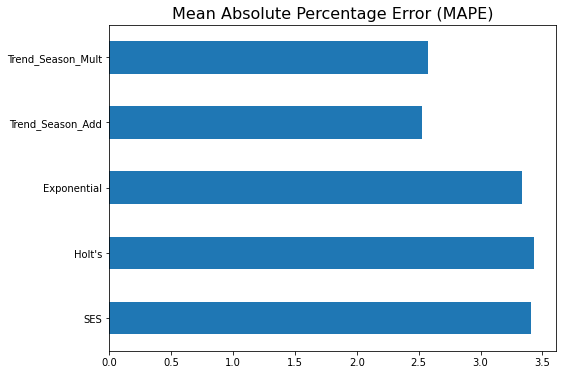

In [410]:
# horizontal bar chart
eval_all_df.loc['MAPE', :].plot(kind='barh', figsize=[8, 6])
plt.title('Mean Absolute Percentage Error (MAPE)', fontsize=16)
plt.show()

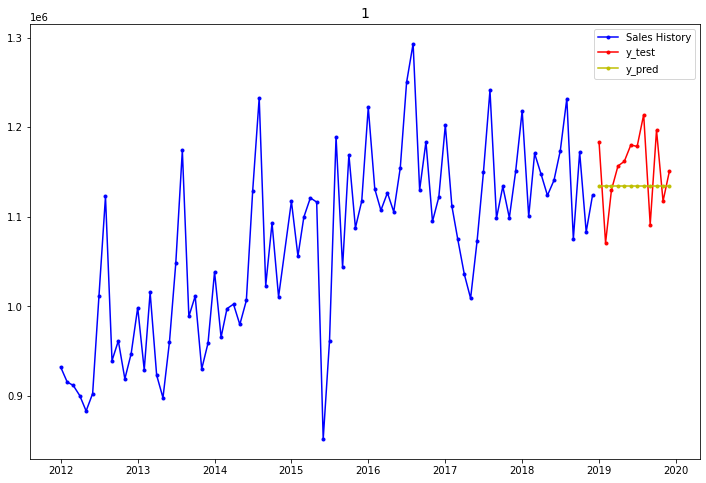

In [411]:
# forcst_1
plt.rcParams['figure.figsize']=[12, 8]
past, = plt.plot(df_train.index, df_train, 'b.-', label='Sales History')
test, = plt.plot(df_test.index, df_test, 'r.-', label='y_test')
pred, = plt.plot(df_test.index, forecast_1, 'y.-', label='y_pred')
plt.title('1', fontsize=14)
plt.legend(handles=[past, test, pred])
plt.show()

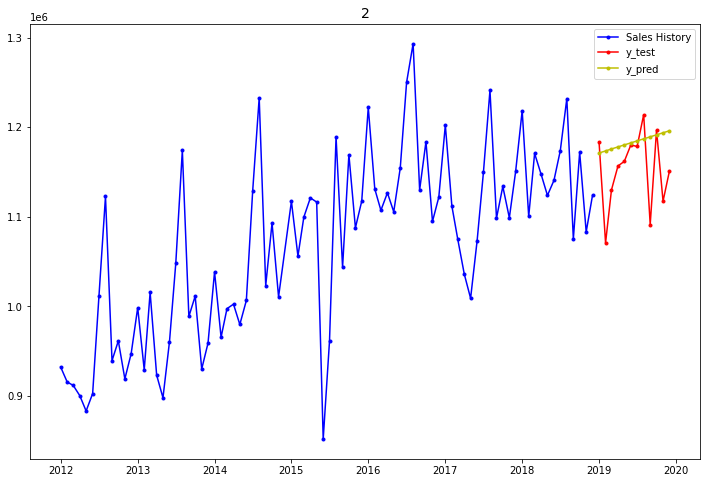

In [412]:
# forcst_2
plt.rcParams['figure.figsize']=[12, 8]
past, = plt.plot(df_train.index, df_train, 'b.-', label='Sales History')
test, = plt.plot(df_test.index, df_test, 'r.-', label='y_test')
pred, = plt.plot(df_test.index, forecast_2, 'y.-', label='y_pred')
plt.title('2', fontsize=14)
plt.legend(handles=[past, test, pred])
plt.show()

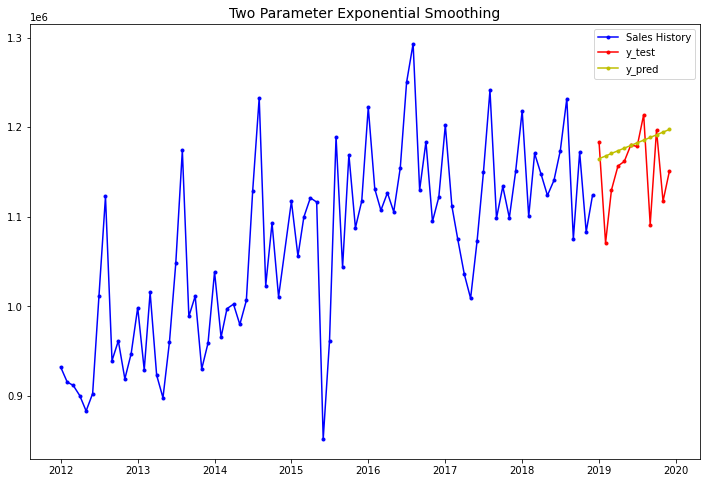

In [413]:
# 1차 선형 추세는 있고 계절성은 없는 이중 지수 평활법
plt.rcParams['figure.figsize']=[12, 8]
past, = plt.plot(df_train.index, df_train, 'b.-', label='Sales History')
test, = plt.plot(df_test.index, df_test, 'r.-', label='y_test')
pred, = plt.plot(df_test.index, forecast_3, 'y.-', label='y_pred')
plt.title('Two Parameter Exponential Smoothing', fontsize=14)
plt.legend(handles=[past, test, pred])
plt.show()

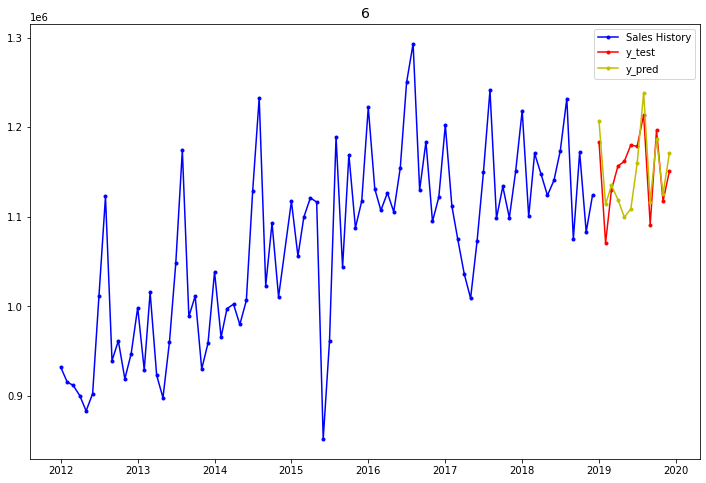

In [414]:
# forcsat_6
plt.rcParams['figure.figsize']=[12, 8]
past, = plt.plot(df_train.index, df_train, 'b.-', label='Sales History')
test, = plt.plot(df_test.index, df_test, 'r.-', label='y_test')
pred, = plt.plot(df_test.index, forecast_6, 'y.-', label='y_pred')
plt.title('6', fontsize=14)
plt.legend(handles=[past, test, pred])
plt.show()

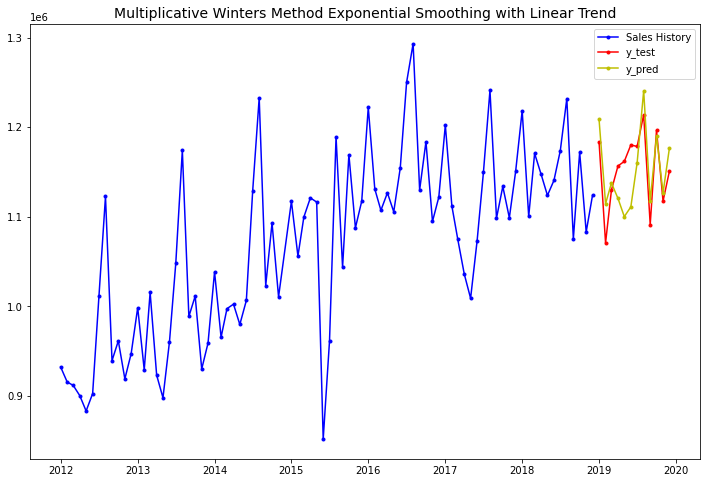

In [415]:
# 1차 선형 추세와 확산계절변동이 있는 승법 윈터스 지수평활법
plt.rcParams['figure.figsize']=[12, 8]
past, = plt.plot(df_train.index, df_train, 'b.-', label='Sales History')
test, = plt.plot(df_test.index, df_test, 'r.-', label='y_test')
pred, = plt.plot(df_test.index, forecast_7, 'y.-', label='y_pred')
plt.title('Multiplicative Winters Method Exponential Smoothing with Linear Trend', fontsize=14)
plt.legend(handles=[past, test, pred])
plt.show()

1. 국제선 여객 예측

In [416]:
df_train1 = pd.read_csv('/content/drive/MyDrive/probability model/Passenger data_intl_2020.csv',parse_dates=['date'],index_col='date')

df_train1.head(10)

,Intl pax
date,
2020-04-01,37034
2020-05-01,39580
2020-06-01,48599
2020-07-01,52958
2020-08-01,54539
2020-09-01,48709
2020-10-01,50544
2020-11-01,50709
2020-12-01,58615


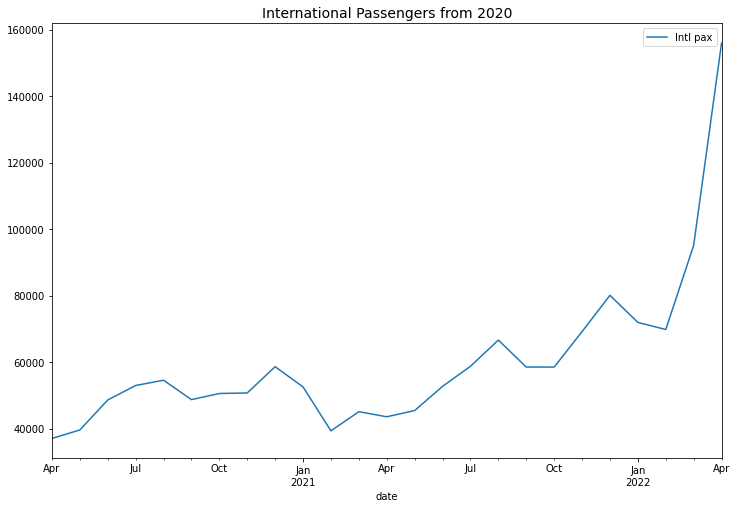

In [417]:
## time series plot
df_train1.plot(figsize=[12,8])
plt.title('International Passengers from 2020', fontsize=14)
plt.show()

In [421]:
# multiplicative model for increasing seasonal variation
fit_train1 = HWES(df_train1, 
             seasonal_periods=12, 
             trend='add', 
             seasonal='mul').fit(optimized=True, use_brute=True)

## accessing the results of 
print(fit_train1.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


                       ExponentialSmoothing Model Results                       
Dep. Variable:                    endog   No. Observations:                   25
Model:             ExponentialSmoothing   SSE                     1426435873.331
Optimized:                         True   AIC                            478.489
Trend:                         Additive   BIC                            497.991
Seasonal:                Multiplicative   AICC                           592.489
Seasonal Periods:                    12   Date:                 Tue, 31 May 2022
Box-Cox:                          False   Time:                         14:27:27
Box-Cox Coeff.:                    None                                         
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level               0.8421053                alpha                 True
smoothing_slope          

In [423]:
## forecasting for 12 months
forecast_train1 = fit_train1.forecast(24)

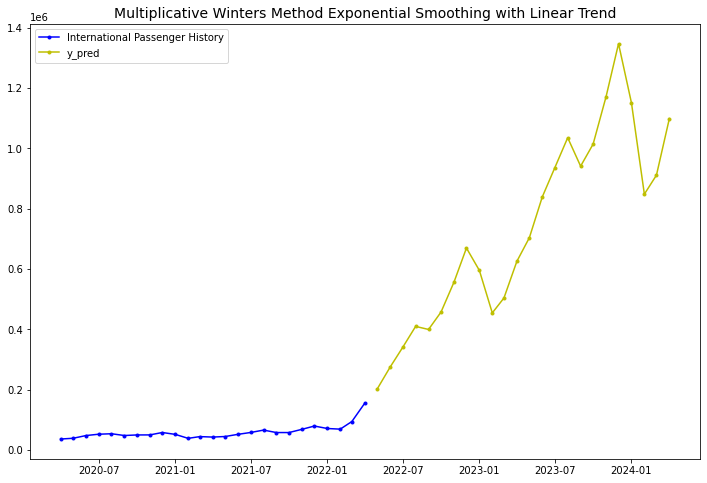

In [424]:
# 1차 선형 추세와 확산계절변동이 있는 승법 윈터스 지수평활법
plt.rcParams['figure.figsize']=[12, 8]
past, = plt.plot(df_train1.index, df_train1, 'b.-', label='International Passenger History')
pred, = plt.plot(forecast_train1.index, forecast_train1, 'y.-', label='y_pred')
plt.title('Multiplicative Winters Method Exponential Smoothing with Linear Trend', fontsize=14)
plt.legend(handles=[past, pred])
plt.show()

2. 국제선 운항편수 예측

In [431]:
df_train2 = pd.read_csv('/content/drive/MyDrive/probability model/flt_2020.csv',parse_dates=['date'],index_col='date')

df_flight = pd.read_csv('/content/drive/MyDrive/probability model/flt_2012_2020.csv',parse_dates=['date'],index_col='date')

df_train2.head(10)

,flight
date,
2020-04-01,475
2020-05-01,636
2020-06-01,598
2020-07-01,737
2020-08-01,753
2020-09-01,773
2020-10-01,833
2020-11-01,1008
2020-12-01,1096


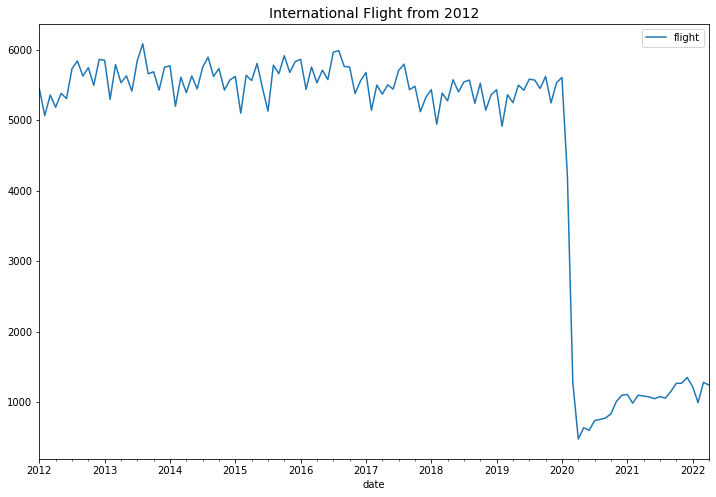

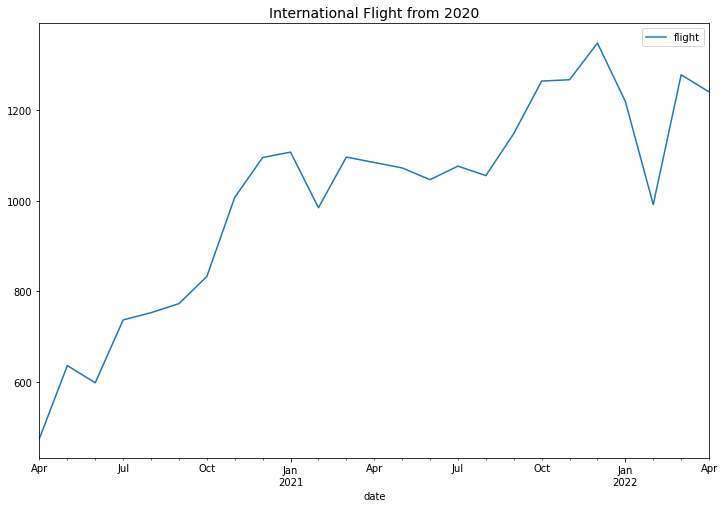

In [432]:
## time series plot

df_flight.plot(figsize=[12,8])
plt.title('International Flight from 2012', fontsize=14)
plt.show()

df_train2.plot(figsize=[12,8])
plt.title('International Flight from 2020', fontsize=14)
plt.show()

In [436]:
# multiplicative model for increasing seasonal variation
fit_train2 = HWES(df_train2, 
             seasonal_periods=12, 
             trend='add', 
             seasonal='mul').fit(optimized=True, use_brute=True)

## accessing the results of 
print(fit_train2.summary())

                       ExponentialSmoothing Model Results                       
Dep. Variable:                    endog   No. Observations:                   25
Model:             ExponentialSmoothing   SSE                          74505.975
Optimized:                         True   AIC                            231.994
Trend:                         Additive   BIC                            251.496
Seasonal:                Multiplicative   AICC                           345.994
Seasonal Periods:                    12   Date:                 Tue, 31 May 2022
Box-Cox:                          False   Time:                         15:04:59
Box-Cox Coeff.:                    None                                         
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level               0.8447166                alpha                 True
smoothing_slope          

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [445]:
## forecasting for 24 months
forecast_train2 = fit_train2.forecast(8)

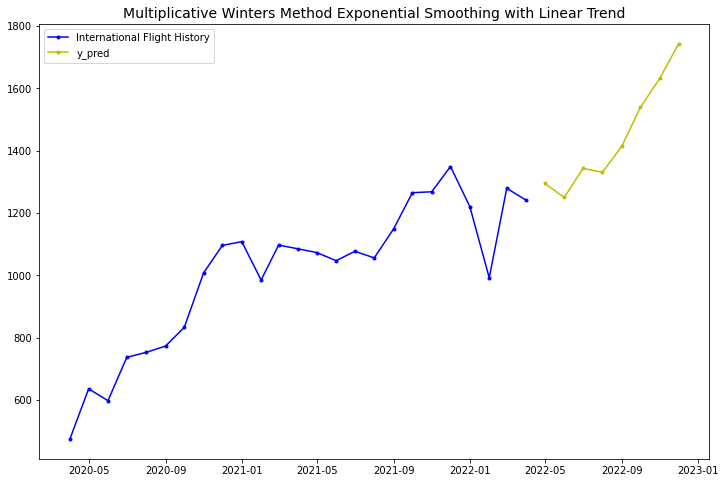

In [446]:
# 1차 선형 추세와 확산계절변동이 있는 승법 윈터스 지수평활법
plt.rcParams['figure.figsize']=[12, 8]
past, = plt.plot(df_train2.index, df_train2, 'b.-', label='International Flight History')
pred, = plt.plot(forecast_train2.index, forecast_train2, 'y.-', label='y_pred')
plt.title('Multiplicative Winters Method Exponential Smoothing with Linear Trend', fontsize=14)
plt.legend(handles=[past, pred])
plt.show()